   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


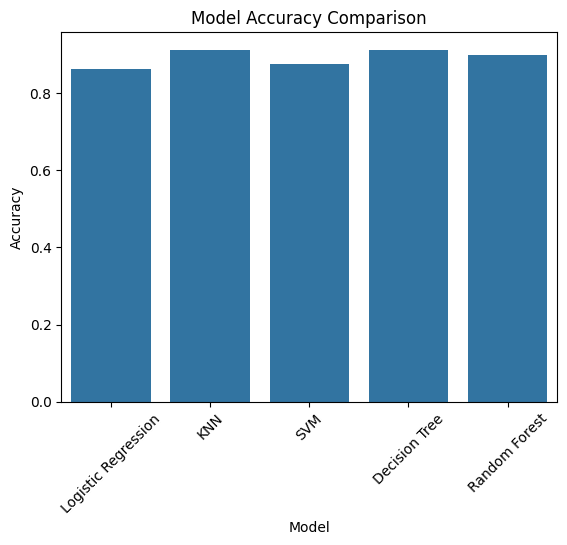

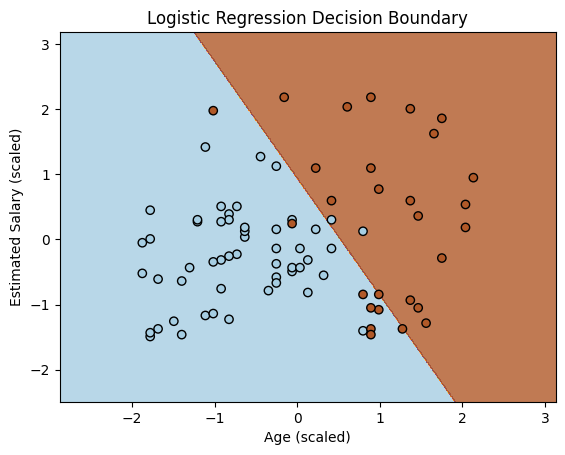

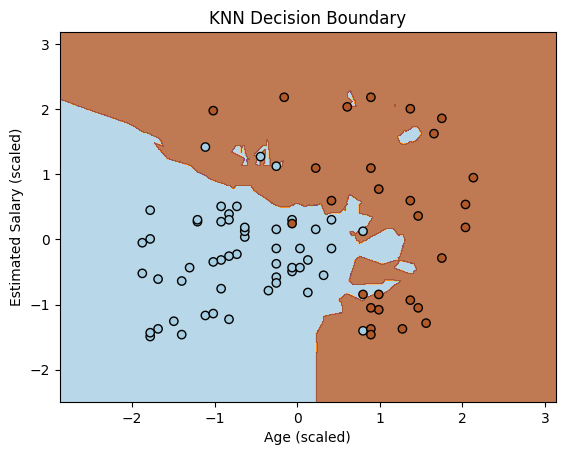

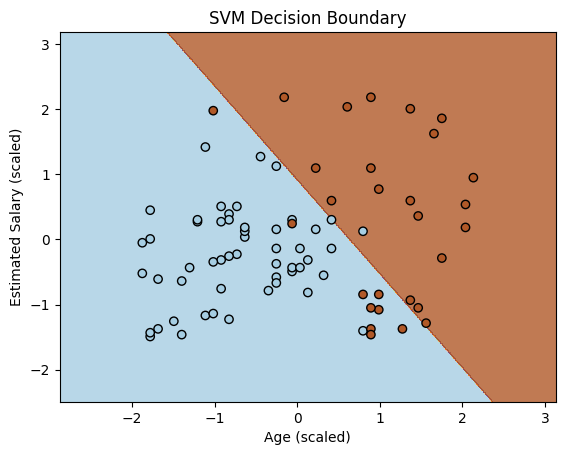

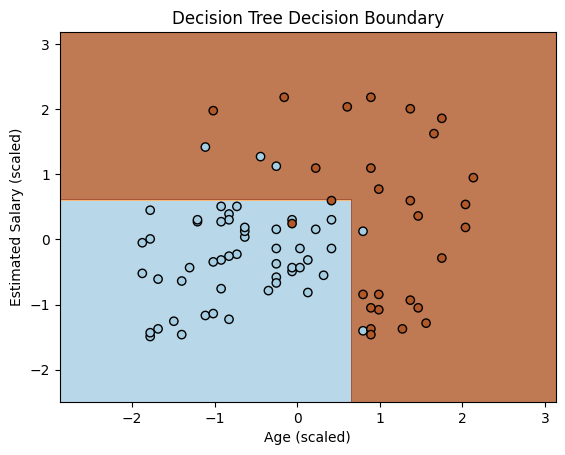

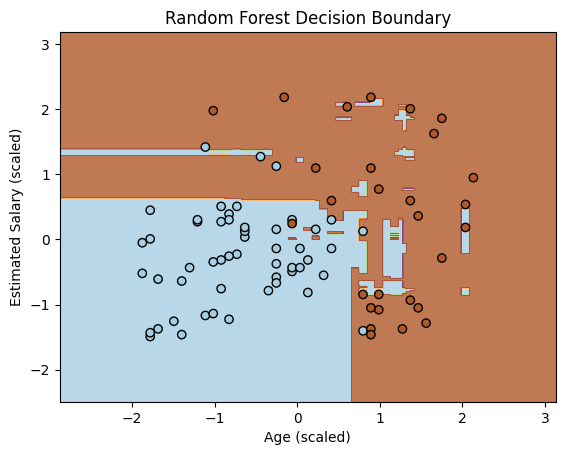


Predictions for specified inputs:
Logistic Regression predictions: [0 0 1 0 0 1 1 1]
KNN predictions: [0 0 1 1 0 1 1 1]
SVM predictions: [0 0 1 0 0 1 1 1]
Decision Tree predictions: [0 0 1 1 0 1 1 1]
Random Forest predictions: [0 0 1 1 0 1 1 1]


c:\Users\akalo\OneDrive\Desktop\Customer Insurance Purchases Case Study\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
data = pd.read_csv(r'C:\Users\akalo\OneDrive\Desktop\Customer Insurance Purchases Case Study\Social_Network_Ads.csv')

# Data exploration
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
if data.isnull().sum().sum() > 0:
    print("Dataset contains missing values. Please clean the dataset.")
else:
    print("No missing values detected.")

# Data preprocessing
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Hyperparameter tuning
param_grids = {
    "KNN": {'n_neighbors': [3, 5, 7]},
    "SVM": {'C': [0.1, 1, 10]},
    "Decision Tree": {'max_depth': [3, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200]}
}

def tune_model(model, params):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

for name in param_grids:
    if name in classifiers:
        classifiers[name] = tune_model(classifiers[name], param_grids[name])

# Training and evaluating models
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Results summary
results_df = pd.DataFrame(results)
print(results_df)

# Visualization of results
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Graphical Analysis
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.show()

for name, clf in classifiers.items():
    plot_decision_boundary(clf, X_test, y_test, title=f"{name} Decision Boundary")

# Predictions for specified age and salary inputs
input_data = [
    [30, 87000],
    [40, 0],
    [40, 100000],
    [50, 0],
    [18, 0],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
]
input_data_scaled = scaler.transform(input_data)

print("\nPredictions for specified inputs:")
for name, clf in classifiers.items():
    predictions = clf.predict(input_data_scaled)
    print(f"{name} predictions: {predictions}")


In [2]:
import pickle

# Assuming `classifiers` is the dictionary of trained models
for name, model in classifiers.items():
    with open(f"{name.lower().replace(' ', '_')}.pkl", "wb") as file:
        pickle.dump(model, file)

# Save the scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)


In [8]:
app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


In [12]:
app.run(debug=True, port=8000)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1